1. How many unique customers are in the dataset? // **ANSWER: 5191**

In [2]:
import pandas as pd

customer_data = pd.read_json('dim_customer.json')
unique_customer_id_count = customer_data['id'].nunique()

print(unique_customer_id_count)

5191


2. What are the different categories of products available? How many unique categories are there? //  **ANSWER: The categories are as follows: Clothing, Shoes, Books, Cosmetics, Food & Beverage, Toys, Technology, Souvenir. There are 8 categories in total.**

In [3]:
import pandas as pd

customer_data = pd.read_json('dim_customer.json')
product_invoice_data = pd.read_csv('fct_invoice.csv')

product_category_list = pd.unique(product_invoice_data['category'])
num_product_categories = (product_category_list != "").sum()

print(product_category_list, num_product_categories)

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir'] 8


3. Which payment method is the most popular? How many times was it used? // **ANSWER: Cash is the most popular with 44,447 uses out of 99,457**

In [4]:
payment_method_list = product_invoice_data['payment_method'].value_counts()
print(payment_method_list)

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64


MEDIUM 1. What are the three most popular categories, by total sales? // **ANSWER: Clothing, Shoes, and Technology. (See table below)**

In [13]:
import pandas as pd
product_invoice_data = pd.read_csv('fct_invoice.csv')

product_invoice_data['total_sales'] = product_invoice_data['quantity'] * product_invoice_data['price']
output_df = product_invoice_data[['category', 'total_sales']]
print(output_df.groupby('category').sum())

                  total_sales
category                     
Books            8.345529e+05
Clothing         1.139968e+08
Cosmetics        6.792863e+06
Food & Beverage  8.495351e+05
Shoes            6.655345e+07
Souvenir         6.358247e+05
Technology       5.786235e+07
Toys             3.980426e+06


2. What are the total sales attributed to customers over the age of 45? // **ANSWER: 82039768.14999999**

In [9]:
import pandas as pd

customer_data = pd.read_json('dim_customer.json')
merge_pd = pd.merge(customer_data, product_invoice_data, left_on='id', right_on='customer_id', how='left')

filtered_df = merge_pd[merge_pd['age'] > 45]
output = filtered_df['price'] * filtered_df['quantity']
print(output.sum())

82039768.14999999


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

      Month-Year  quantity
0        2022/08         5
1        2021/12         3
2        2021/11         1
3        2021/05         5
4        2021/10         4
...          ...       ...
99452    2022/09         5
99453    2021/09         2
99454    2021/03         2
99455    2021/03         4
99456    2022/10         3

[99457 rows x 2 columns]


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, '2021/01'),
  Text(1, 0, '2021/02'),
  Text(2, 0, '2021/03'),
  Text(3, 0, '2021/04'),
  Text(4, 0, '2021/05'),
  Text(5, 0, '2021/06'),
  Text(6, 0, '2021/07'),
  Text(7, 0, '2021/08'),
  Text(8, 0, '2021/09'),
  Text(9, 0, '2021/10'),
  Text(10, 0, '2021/11'),
  Text(11, 0, '2021/12'),
  Text(12, 0, '2022/01'),
  Text(13, 0, '2022/02'),
  Text(14, 0, '2022/03'),
  Text(15, 0, '2022/04'),
  Text(16, 0, '2022/05'),
  Text(17, 0, '2022/06'),
  Text(18, 0, '2022/07'),
  Text(19, 0, '2022/08'),
  Text(20, 0, '2022/09'),
  Text(21, 0, '2022/10'),
  Text(22, 0, '2022/11'),
  Text(23, 0, '2022/12'),
  Text(24, 0, '2023/01'),
  Text(25, 0, '2023/02'),
  Text(26, 0, '2023/03')])

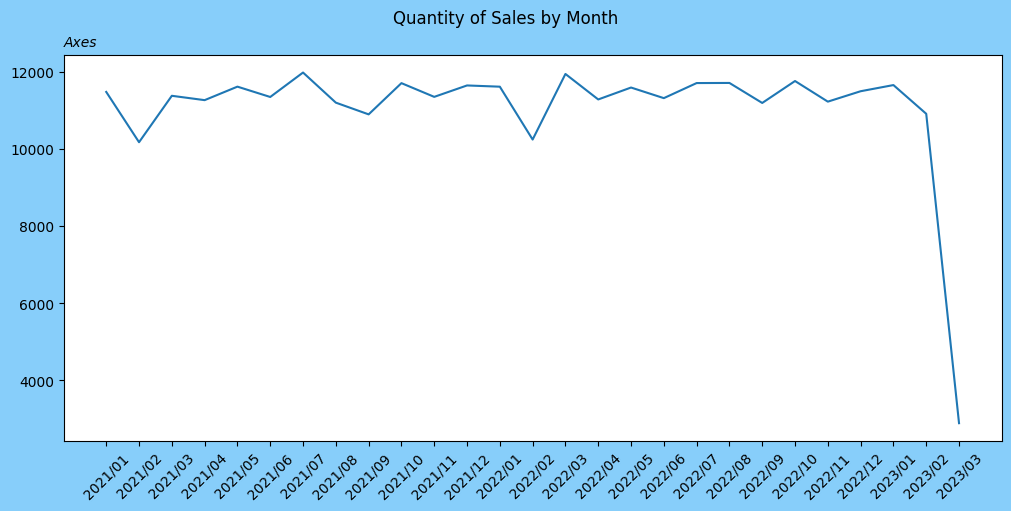

In [26]:
import datetime

product_invoice_data['Date'] = pd.to_datetime(product_invoice_data.invoice_date, format='%d/%m/%Y')
product_invoice_data['Month-Year'] = product_invoice_data['Date'].dt.strftime('%Y/%m')

import requests
import matplotlib.pyplot as plt

filtered_data = product_invoice_data[['Month-Year', 'quantity']]
date_points = filtered_data.groupby('Month-Year').sum()


fig = plt.figure(figsize=(10, 5), facecolor='lightskyblue', layout='constrained')
fig.suptitle('Quantity of Sales by Month')
ax = fig.add_subplot()
ax.set_title('Axes', loc='left', fontstyle='oblique', fontsize='medium')
ax.plot(date_points)
plt.xticks(rotation = 45)


**GRAPH EXPLANATION**: The graph above displays the quantity of sales by month across all malls and categories. This provides insight into the more generalizable trends surrounding customer purchasing behavior across the years.

Based on this data, there appears to be a regular dip in sales around February each year, with a similar but less severe decrease occuring in Septembers as well. This contrasts the higher volumes in the midyear at around June and July. 

Finally, it must be noted that the sales data for March of 2023 is incomplete, resulting in the large dip in sales in the graph.


HARD 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [32]:
merge_pd = pd.merge(customer_data, product_invoice_data, left_on='id', right_on='customer_id', how='left')
sorted_df = merge_pd.groupby(['category', pd.cut(merge_pd['age'], [10, 20, 30, 40, 50, 60, 70, 80, 90])]).sum()
sorted2_df = sorted_df[['price']]

pivot_table = pd.pivot_table(sorted2_df, values='price', index='category', columns='age', aggfunc=sum, fill_value=0)
print(pivot_table)


pd.set_option('display.max_rows', None)


age               (10, 20]    (20, 30]    (30, 40]    (40, 50]    (50, 60]  \
category                                                                     
Books              5317.65    21861.45    23058.30    22285.65    21785.70   
Clothing         816817.76  2770638.64  3118131.28  2999599.68  2941384.16   
Cosmetics         47897.48   162599.34   197810.90   178172.12   171341.24   
Food & Beverage    5580.41    20548.67    24324.73    23236.89    21474.38   
Shoes            382908.46  1686477.70  1909140.77  1821515.95  1699681.44   
Souvenir           5372.34    14861.91    17442.51    17454.24    15858.96   
Technology       459900.00  1378650.00  1687350.00  1593900.00  1283100.00   
Toys              26808.32   101821.44   116802.56   103613.44    98452.48   

age                (60, 70]    (70, 80]    (80, 90]  
category                                             
Books              20513.10    15619.65     6196.35  
Clothing         2724726.40  2146772.32  1020572.08  
Cos